In [1]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

## Exercise 1

The numpy function numpy.random.beta can be used to generate random values from the $Beta(\alpha=2, \beta=5)$ distribution. Note that the numpy.random.beta function has arguments $a$ which is equivalent to $\alpha$, and $b$ which is equivalent to $\beta$.

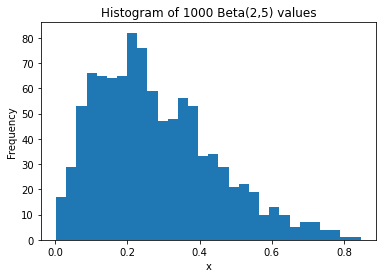

In [2]:
## Exercise 1

# set the seed for the random number generator
np.random.seed(1729)

# Set number of samples to be drawn
n_sample = 1000

# Use the numpy function numpy.random.beta to generate the samples
alpha = 2.0
beta = 5.0
random_beta_values = np.random.beta(a=alpha, b=beta, size=n_sample)

# Plot a histogram of the random beta values
plt.hist( random_beta_values, bins=30)
plt.title('Histogram of 1000 Beta(2,5) values')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

## Exercise 2

Sampling values from either the $Normal(1.0, 3.5)$ distribution or the $Laplace(10.0, 1.5)$ distribution follows the code patterns given in the chapter. We use the function numpy.random.randn to sample from the Normal distribution and we use the function numpy.random.laplace to sample from the Laplace distribution. The new ingredient is we must flip a coin (with 40% probability of coming down saying "sample from the $Normal(1.0, 3.5)$), to decide which component of the mixture to sample from. Flipping this imaginary coin is equivalent to sampling a Bernoulli random variable with a 40% success probability. The easiest way to do this is to sample a uniform random variable, $Uniform(0,1)$ and compare it to the success probability. This is using the first principles method for sampling from a (two outcome) probability distribution that was given in the chapter. 

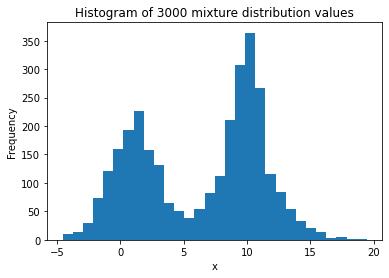

In [3]:
## Exercise 2

# set the seed for the random number generator
np.random.seed(11138)

# Set number of samples to be drawn
n_sample = 3000

# Specify parameters of the Normal component of the mixture
mean_normal = 1.0
var_normal = 3.5
std_normal = np.sqrt(var_normal)

# Specify parameters of the Laplace component of the mixture
mean_laplace = 10.0
scale_laplace = 1.5

# Specify the mixture component weight.
# This is called the mixture proportions
# Since we have 2 components in our mixture and
# the mixture proportions must sum to 1, we only 
# need on mixture proportion value. This is 0.4
mixture_proportion = 0.4

# We will use the numpy functions numpy.random.rand,
# numpy.random.randn and numpy.random.laplace to generate the samples

random_mixture_values = np.empty(n_sample)
for i in range(n_sample):
    # Use a Bernoulli random variable to 
    # decide which mixture component we are drawing from. 
    # We can do this by simply drawing a random number from 
    # Uniform(0,1) and comparing it to our mixture proportion

    if np.random.rand() < mixture_proportion:
        random_mixture_values[i] = mean_normal + (std_normal*np.random.randn())
    else:
        random_mixture_values[i] = np.random.laplace(loc=mean_laplace, scale=scale_laplace)

# Plot a histogram of the random mixture distribution values
plt.hist( random_mixture_values, bins=30)
plt.title('Histogram of 3000 mixture distribution values')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

## Exercise 3

We start with the expression, 
$${\rm Variance}\;=\; \mathbb{E}\left ( (X - \mathbb{E}(X))^2 \right )\;\;\;\;,$$

and expand the square inside the expectation operator brackets to get,

$${\rm Variance}\;=\; \mathbb{E}\left ( X^{2}-2X\mathbb{E}(X)+ (\mathbb{E}(X))^{2} \right )\;\;\;\;.$$

Since taking the expectation is a linear operator, we can apply $\mathbb{E}$ to individually to each one of the terms inside the brackets above. This is the same as when we learnt about combining random variables. From this we get,

$${\rm Variance}\;=\; \mathbb{E}(X^2)- \mathbb{E}(2X\mathbb{E}(X)) + \mathbb{E}\left ((\mathbb{E}(X))^2 \right )\;\;\;\;.$$

Now since, $\mathbb{E}(X)$, has already averaged over the randomness of the variable $$, it is actually a constant from the perspective of further application of the operator $\mathbb{E}$. In other words, $\mathbb{E}\left(\mathbb{E}(X)\right ) = \mathbb{E}(X)$. Similarly, $\mathbb{E}\left ((\mathbb{E}(X))^2 \right ) = \left (\mathbb{E}(X)\right )^2$. And so the equation above can be simplified to,

$${\rm Variance}\;=\; \mathbb{E}(X^2) - 2\mathbb{E}(X)\times\mathbb{E}(X)+ \left (\mathbb{E}(X)\right )^2
\;=\; \mathbb{E}(X^2) - 2\left (\mathbb{E}(X)\right )^2+ \left (\mathbb{E}(X)\right )^2
\;=\; \mathbb{E}(X^2) - \left(\mathbb{E}(X)\right )^2\;\;\;\;.$$

which is the result required. 

A useful corollary of this is that if $\sigma^2$ is the variance of $X$ and $\mu$ its mean, then we have the relationship,

$$\mathbb{E}(X^2)\;=\; \sigma^{2} + \mu^{2}\;\;\;\;.$$


## Exercise 4

We will use the kernel density estimation method from sklearn.neighbors. The three different choices of bandwidth are $h=0.1$, $h=0.65$ and $h=3.0$. The middle value, h=0.65 represents a value close to that calculated using Scott's rule of thumb, $h=1.05\times s \times n^{-\frac{1}{5}}$. Consequently, the middle bandwidth value produces an ok density estimate (compared to the true density). The first bandwidth value of $h=0.1$ is very small by comparison and so the datapoints are not smoothed out enough. The resulting density estimate is very jagged, and not dis-similar to the empirical distribution shown by the tick marks at the data values (called a rugplot). The last bandwidth value is too big. It smooths out the data too much and so we see little of the structure of the true density. 

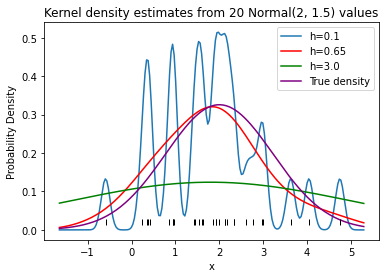

In [4]:
## Exercise 4

# Set the seed for the random number generator
np.random.seed(16422)

# Set the number of datapoints to be sampled
n_sample = 30

# Set the characteristics of the population distribution
mean_population = 2.0
var_population = 1.5
std_population = np.sqrt(var_population)


# Sample the data
x_sample = np.random.normal(loc=mean_population, scale=std_population, size=(n_sample,1))

# Calculate sample characteristics
mean_sample = np.mean(x_sample)
std_sample = np.sqrt(np.var(x_sample))

# Construct the kernel density function using a Parzen (Gaussian window)
# and using the three different bandwidths, h=0.1, 0.65, 3.0
parzen_kde_h01 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(x_sample)
parzen_kde_h065 = KernelDensity(kernel='gaussian', bandwidth=0.65).fit(x_sample)
parzen_kde_h3 = KernelDensity(kernel='gaussian', bandwidth=3.0).fit(x_sample)


# Construct x values at which we want to calculate the 
# kernel density estimatew
x = np.linspace(mean_sample - (3.0*std_sample), mean_sample+(3.0*std_sample),200)

# Calculate the log of the kernel density estimate for the regular spaced points
log_density_parzen_h01 = parzen_kde_h01.score_samples(x.reshape(200,1))
log_density_parzen_h065 = parzen_kde_h065.score_samples(x.reshape(200,1))
log_density_parzen_h3 = parzen_kde_h3.score_samples(x.reshape(200,1))

# Plot the kernel density estimates
fig, ax = plt.subplots()

ax.plot(x, np.exp(log_density_parzen_h01), label='h=0.1')
ax.plot(x, np.exp(log_density_parzen_h065), 'red', label='h=0.65')
ax.plot(x, np.exp(log_density_parzen_h3), 'green', label='h=3.0')

# Add the true density
true_density = np.exp(-0.5*np.power((x-mean_population)/std_population, 2.0))/np.sqrt(2.0*np.pi*var_population)
ax.plot(x, true_density, 'purple', label='True density')

# Add a 'rugplot'. This is a tick mark at every data value
# There are more elegant ways to do this using the seaborn
# package, but we will use this simple hack for now.
ax.plot(x_sample, [0.02]*len(x_sample), '|', color='black')

# Add graph annotation and display
plt.legend(loc='upper right')
plt.title('Kernel density estimates from 20 Normal(2, 1.5) values')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.show()

## Exercies 5

This proof is slightly harder. The expression for the sample variance is,
$$s^{2}\;=\; \frac{1}{n-1} \sum_{i=1}^{n} (x_{i}-m)^{2}\;\;\;\;,$$ 

where $m$ is the sample mean. For $s^2$ to be an unbiased estimator we need $\mathbb{E}(s^{2} )= \sigma^{2}$ , where the average in this expectation is taken over datasets $x_1,x_2,⋯,x_n$. We start the proof by expanding the square $(x_i-m)^2= x_i^2-2x_i m+ m^2$ and then applying the expectation operator $\mathbb{E}$ to each term individually. So, what we get is,

$$\mathbb{E}(s^{2})\;=\; \mathbb{E}\left ( \frac{1}{n-1} \sum_{i=1}^{n} (x_{i}^2-2x_{i} m+ m^2) \right )
=  \frac{1}{n-1} \sum_{i=1}^{n}\left ( \mathbb{E}\left ( x_{i}^2)-2\mathbb{E}(mx_{i}) + \mathbb{E}(m^2)\right )\right )\;\;\;\;.$$

Here we have made use of the fact that we can swap the order of the summation $\Sigma$ and the expectation $\mathbb{E}$ because we are combining quantities in a linear way. The quantity $E(mx_i)$ is slightly complicated because the sample mean $m$ depends upon $x_i$, but if we remember we are dealing with $i.i.d.$ values $x_1,x_2,\ldots,x_n$, so that $\mathbb{E}(x_{i} x_{j} ) =  \mathbb{E}(x_{i})\mathbb{E}(x_{j})= \mu^{2}$ if $i\neq j$, and from the corollary of Exercise 3 we also have $\mathbb{E}(x_{i} x_{j})\;=\; \sigma^{2}+ \mu^{2}$ if $i=j$, then when we write out $\mathbb{E}(mx_{i})$ we can simplify it to get,

$$\mathbb{E}\left (mx_{i}\right)\;=\; \frac{1}{n} \sum_{j=1}^{n}\mathbb{E}(x_{j}x_{i})\;=\; \frac{1}{n}\left ( n\mu^{2} + \sigma^{2} \right )\;\;\;\;.$$


The last step follows because we have $i.i.d.$ values $x_i$ and so $\mathbb{E}(x_{i}) = \mu$ and $\mathbb{E}(x_{i}^{2}) = \sigma^{2}$ for any value of $i$. We can apply a similar trick to $\mathbb{E}(m^2)$,

$$\mathbb{E}(m^2)\;=\; \mathbb{E}\left ( \frac{1}{n^{2}}\sum_{i=1}^{n}\sum_{j=1}^{n} \left ( x_{i} x_{j}\right ) \right )\;=\;  \frac{1}{n^{2}} \sum_{i=1}^{n}\sum_{j=1}^{n}\mathbb{E}(x_{i} x_{j})\;=\;\frac{1}{n}\left( n\mu^{2} + \sigma^{2} \right )\;\;\;\;.$$ 

So, combining all these results we get,

$$\mathbb{E}(s^{2})\;=\;\frac{1}{n-1}\sum_{i=1}^{n}\left ( \mathbb{E}(x_{i}^{2}) - 2\mathbb{E}(mx_{i}) + \mathbb{E}(m^{2}) \right )\;=\; \frac{1}{n-1} \left ( n(\sigma^{2} + \mu^{2} ) -2\frac{n}{n} (n\mu^{2} + \sigma^{2} ) + \frac{n}{n}(n\mu^{2} + \sigma^{2}) \right )\;=\; \frac{(n-1)\sigma^{2}}{n-1}\;=\; \sigma^{2}     .$$

so the sample variance is unbiased at any finite value of $n$. 
